<a href="https://colab.research.google.com/github/JoelGutierrezA/Data-Price-Vehicle/blob/main/DataSet_Examen_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Obesity Data Set

El siguiente DataSet entrega información sobre la estimación del índice de obesidad en personas de los países de México, Perú y Colombia.

Ademas, entrega diversas informaciones sobre las personas, tales como edad, hábitos alimentarios, peso, estatura, entre otros.

###INTEGRANTES

- Joel Gutierrez
- Nicolás Rebolledo
- Jimmy Vargas

###Docente
- Jorge Guzman

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#I.- Análisis Exploratorio de Datos (EDA)

In [ ]:
# Realizamos la carga de datos.
data = pd.read_csv('ObesityDataSet.csv')
data.sample(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1017,Female,42.189023,1.647768,79.165306,yes,yes,2.0,3.000000,Sometimes,no,1.000000,no,0.0,1.48189,no,Automobile,Overweight_Level_II
183,Female,23.000000,1.480000,60.000000,yes,yes,2.0,1.000000,Sometimes,yes,1.000000,no,0.0,0.00000,Sometimes,Public_Transportation,Overweight_Level_II
1358,Male,18.000000,1.792687,108.204547,yes,yes,2.0,2.478794,Sometimes,no,2.967064,no,1.0,0.43460,no,Public_Transportation,Obesity_Type_I
79,Male,23.000000,1.650000,60.000000,yes,no,2.0,3.000000,Sometimes,no,2.000000,no,0.0,0.00000,Sometimes,Public_Transportation,Normal_Weight
800,Female,18.000000,1.644682,68.392133,yes,yes,2.0,1.131695,Sometimes,no,1.344539,no,0.0,1.59257,no,Public_Transportation,Overweight_Level_I


In [ ]:
#Tamaño del Data Set
data.shape

(2111, 17)

###Observaciones:

El DataSet presenta 2.111 filas y 17 columnas de características de cada persona.

In [ ]:
#Revisar los tipos de las variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
#Muestra los valores actuales nulos en porcentaje
print("Porcentaje de datos faltantes en la columna")
for col in data.columns:
    print(col+" : "+str(round(data[col].isnull().sum()/data.shape[0]*100,2))+"%")

Porcentaje de datos faltantes en la columna
Gender : 0.0%
Age : 0.0%
Height : 0.0%
Weight : 0.0%
family_history_with_overweight : 0.0%
FAVC : 0.0%
FCVC : 0.0%
NCP : 0.0%
CAEC : 0.0%
SMOKE : 0.0%
CH2O : 0.0%
SCC : 0.0%
FAF : 0.0%
TUE : 0.0%
CALC : 0.0%
MTRANS : 0.0%
NObeyesdad : 0.0%


###Observaciones:

Se observan que todas las varaibles no presentan ningún valor nulo entre sus datos.

In [ ]:
#Obtención de algunas medidas estadísticas
data.Age.describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

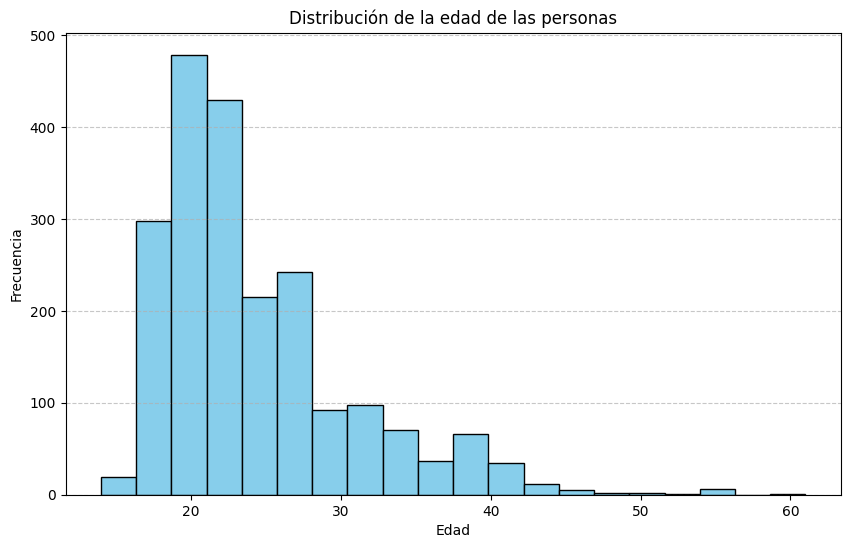

In [ ]:
#Gráfico 1 de barras con variable 'Age'

'''
Age: Edad de las personas
'''
plt.figure(figsize=(10, 6))
plt.hist(data['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de la edad de las personas')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observaciones:
Se puede observar que los datos estan sesgados hacía la izquierda, donde se puede ver que la moda es de 20 años.

Gracias al analísis de medidas estadísticas, se puede ver que el promedio (24), esta cerca de la mediana (22), sin embargo existen datos muy lejanos como el máximo (61) los valores del promedio y mediana.

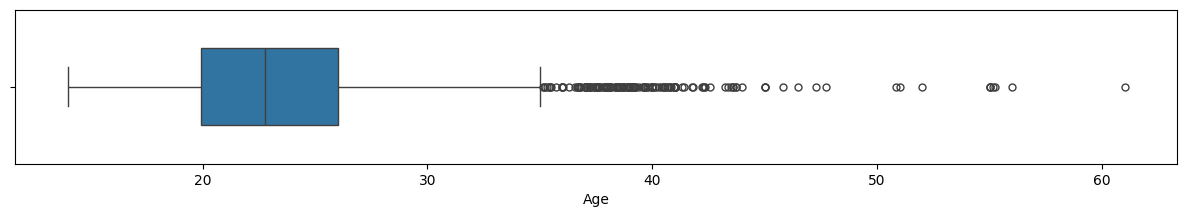

In [ ]:
#grafico 2 de box plot para identificación de outliers
plt.figure(figsize=(15,2))
sns.boxplot(x=data['Age'], fliersize=5, width=0.5);

###Observaciones:

En este gráfico se puede observar la gran cantidad de datos outiers, los cuales están por sobre los 35 años aproximadadmente.
Se puede observar en el gráfica y gracias al anterior calculo de medidas estadísticas la mediana (22 años).

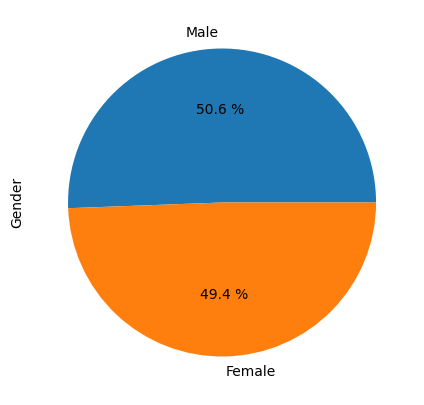

In [ ]:
#Gráfico 3 de torta de la variable genero 'Gender'
data['Gender'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

###Observaciones:
Se observa que la distribución de los generos es bastante similiar, existe solo un 0.6% de diferencia entre ellos

In [ ]:
#Descripción de la variable 'CALC'
data.CALC.describe()

count          2111
unique            4
top       Sometimes
freq           1401
Name: CALC, dtype: object

In [ ]:
#Valores unicos del Consumo de alimentos entre comidas 'CALC'
valoresCALC = data['CALC'].unique()
print(valoresCALC)

['no' 'Sometimes' 'Frequently' 'Always']


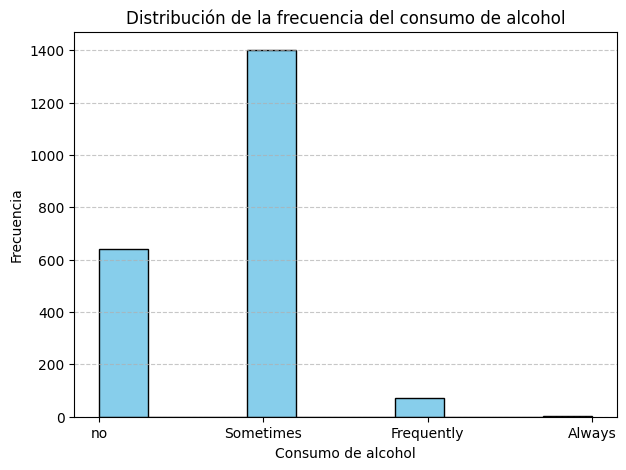

In [ ]:
#Gráfico 4 de barras con variable 'CALC'

'''
CALC: Consumo de alcohol.
'''
plt.figure(figsize=(7, 5))
plt.hist(data['CALC'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de la frecuencia del consumo de alcohol')
plt.xlabel('Consumo de alcohol')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observaciones:

Se puede observar la frecuencia de veces que las personas consumen alcohol, donde se observa que la mayoria de las personas cosume algunas veces (sometimes).

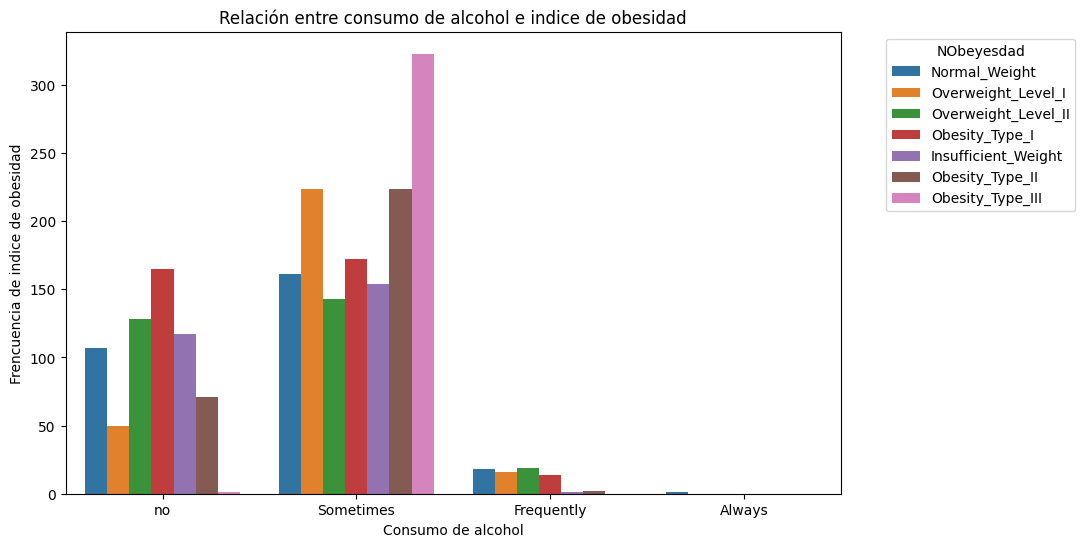

In [ ]:
# Gráfico 5 de barras de indice de obesidad con el consumo de alcohol
'''
Consumo de alcohol (CAEC):

  'No': No
  'Sometimes': A veces
  'Frequently': Frecuentemente
  'Always': Siempre

Indice de obesidad (NObeyesdad):

  'Normal_Weight':       Peso Normal
  'Overweight_Level_I':  Sobrepeso Nivel I
  'Overweight_Level_II': Sobrepeso Nivel II
  'Obesity_Type_I':      Obesidad Tipo I
  'Insufficient_Weight': Peso Insuficiente
  'Obesity_Type_II':     Obesidad Tipo II
  'Obesity_Type_III':    Obesidad Tipo III
'''

df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.countplot(x='CALC', hue='NObeyesdad', data=df)

# Etiquetas
plt.title('Relación entre consumo de alcohol e indice de obesidad')
plt.xlabel('Consumo de alcohol')
plt.ylabel('Frencuencia de indice de obesidad')
plt.legend(title='NObeyesdad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Observaciones:

Es posible observar que un gran numero de personas "a veces" consumen alcohol. Dentro de este grupo de personas es posible destacar que predomina el indice de obesidad mas alto entre todas, que es "Obesidad tipo III". Tambien es posible apreciar que un pequeño grupo de persones consumen "siempre" alcohol.

In [ ]:
#Valores unicos del Indice de obesidad (NObeyesdad)
data.NObeyesdad.describe()

count               2111
unique                 7
top       Obesity_Type_I
freq                 351
Name: NObeyesdad, dtype: object

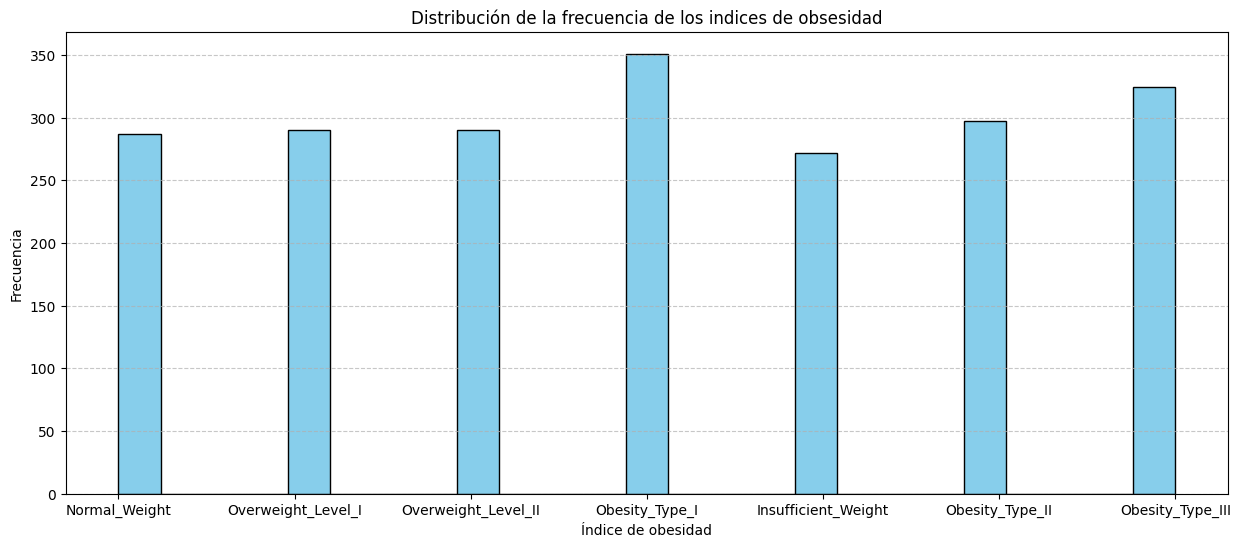

In [ ]:
#Gráfico 6 de barras con variable 'NObeyesdad'

'''
NObeyesdad: Índice de Obesidad
'''
plt.figure(figsize=(15, 6))
plt.hist(data['NObeyesdad'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribución de la frecuencia de los indices de obsesidad')
plt.xlabel('Índice de obesidad')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

###Observaciones:
Se puede observar que todos los índices de obesidad presentan una frecuencia similar, sin embargo la que mayor frecuencia tiene es la Obesidad Tipo I (Obesity_Type_I) y la menor es Peso insuficiente (Insufficient_Weight).

In [ ]:
#Valores unicos del Medio de transporte (MTRANS)
data.MTRANS.unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

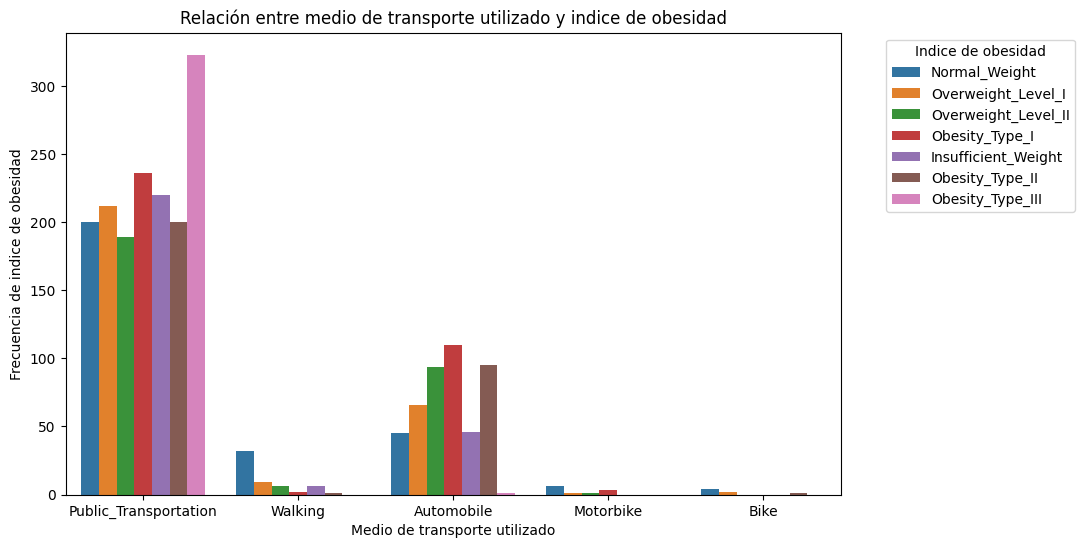

In [ ]:
#Gráfico 7 de barras apiladas de indice de obesidad con el medio de transporte utilizado
'''
Medio de transporte (MTRANS):

  'Public_Transportation': Transporte público
  'Walking':               Caminar
  'Automobile':            Automóvil
  'Motorbike':             Motocicleta
  'Bike':                  Bicicleta


Indice de obesidad (NObeyesdad):

  'Normal_Weight':       Peso Normal
  'Overweight_Level_I':  Sobrepeso Nivel I
  'Overweight_Level_II': Sobrepeso Nivel II
  'Obesity_Type_I':      Obesidad Tipo I
  'Insufficient_Weight': Peso Insuficiente
  'Obesity_Type_II':     Obesidad Tipo II
  'Obesity_Type_III':    Obesidad Tipo III
'''


df = pd.DataFrame(data)
plt.figure(figsize=(10, 6))
sns.countplot(x='MTRANS', hue='NObeyesdad', data=df)

# Etiquetas
plt.title('Relación entre medio de transporte utilizado y indice de obesidad')
plt.xlabel('Medio de transporte utilizado')
plt.ylabel('Frecuencia de indice de obesidad')
plt.legend(title='Indice de obesidad', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

###Observaciones:
Según el el analis al grafico presentado podemos observar que el grupo de personas que suele usar como medio de transporte el "transporte publico", predomina la "obesidad tipo III", mientras que en los medios de transporte que implican mayor actividad fisica como "caminar" o "andar en bicicleta" predomina el "peso normal".

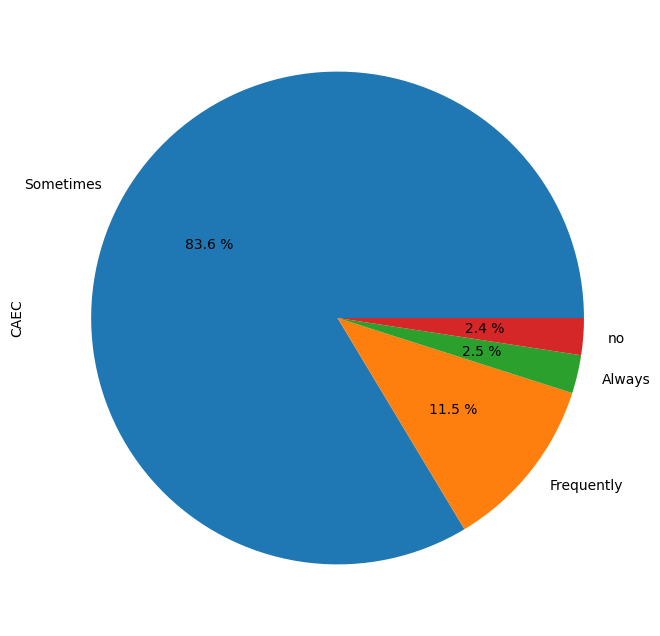

In [ ]:
#Gráfico 8 de torta de Consumo de alimentos entre comidas
'''
CAEC(Consumo de alimentos entre comidas):

  'No': No
  'Sometimes': A veces
  'Frequently': Frecuentemente
  'Always': Siempre

'''
data['CAEC'].value_counts().plot.pie(figsize=(8,8), autopct="%0.1f %%");

###Observaciones:

Se puede observar que un 83.6% de personas "A veces" consumen alimentos entre comidas, siendo esta mayor concentración entre los datos analizados, mientras que la menor cantidad de personas "No" consumen alimentos entre comidas con un 2.4%.

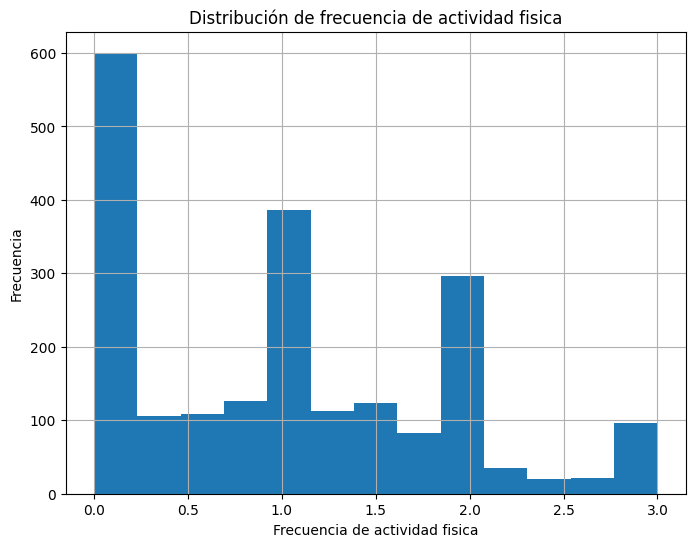

In [ ]:
#Gráfico 9 de barras de frecuencia de actividad fisica
'''
FAF: Frecuencia de actividad fisica
'''

k = int(np.ceil(1+np.log2(data.shape[0]))) # código de la ley de sturges!!!!
data['FAF'].hist(bins=k, figsize=(8,6)).set_title("Distribución de frecuencia de actividad fisica")
plt.xlabel('Frecuencia de actividad fisica')
plt.ylabel('Frecuencia')
plt.show()

###Observaciones:

Es posible observar que la mayor concentración de datos se encuentra en el 0.0 esto quiere decir que la mayoria de las personas encuestadas no realizan ningun tipo de actividad fisica.

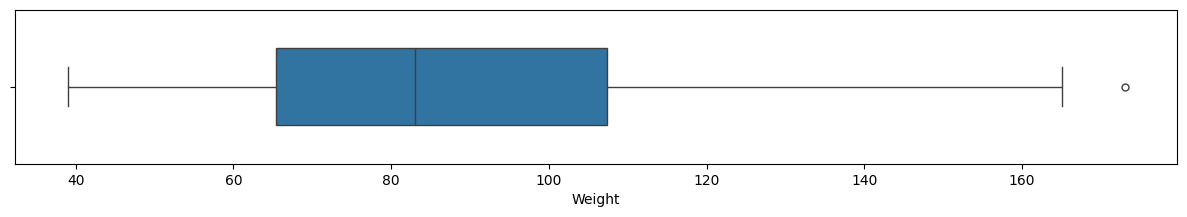

In [ ]:
#Grafico 10 de box plot para identificación de outliers en variable Peso

'''
Weight: Peso
'''

plt.figure(figsize=(15,2))
sns.boxplot(x=data['Weight'], fliersize=5, width=0.5);

###Observaciones:
Podemos ver que la concentración de los datos del peso de las personas encuestadas se encuentra entre los 65kg y los 107kg, y tambien podemos observar un dato fuera de los limites de los extremos (outlier), y la mediana se encuentra en los 83kg.

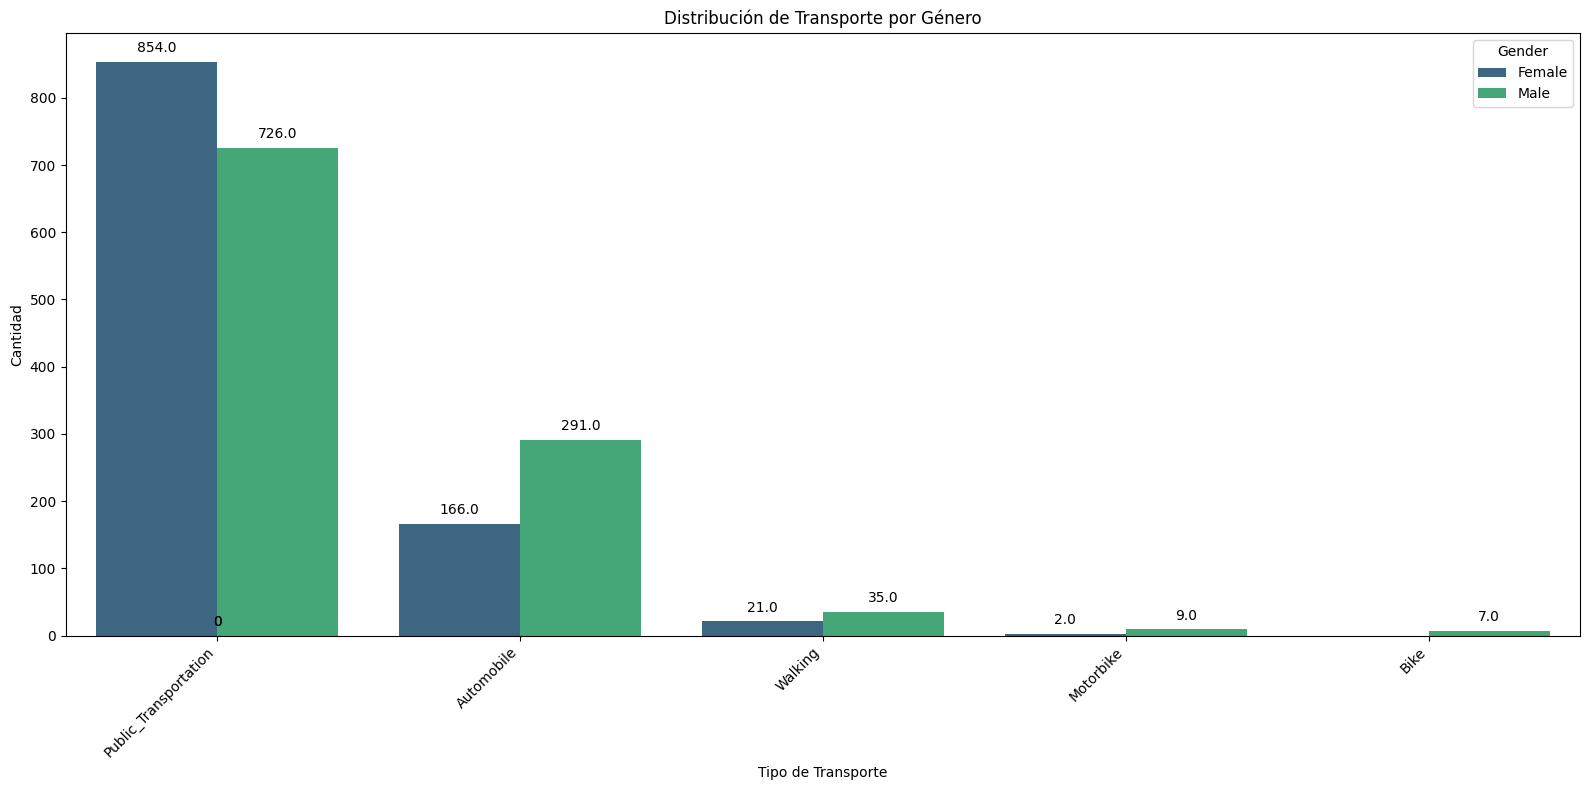

In [ ]:
#Grafico 11 de barras apiladas de distribución de transporte por genero
plt.figure(figsize=(16, 8))
sns.countplot(x='MTRANS', hue='Gender', data=data, palette='viridis', order=data['MTRANS'].value_counts().index)
plt.title('Distribución de Transporte por Género')
plt.xlabel('Tipo de Transporte')
plt.ylabel('Cantidad')

for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()

plt.show()

###Observaciones:
Es posible apreciar que ambos generos la mayor concentración del medio de transporte es el "transporte publico", pero cabe destacar que son mujeres quienes utilizan con mayor frecuencia ente medio (854) a diferencia de los hombres (726). En los otros medios de transporte se puede apreciar que son los hombres quienes predominan.

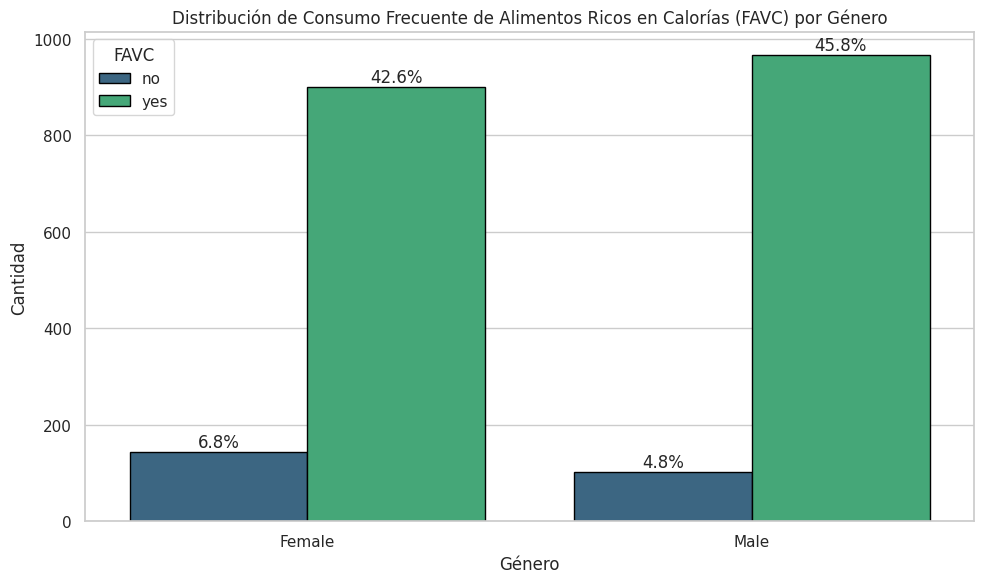

In [ ]:
#Grafico 12 de barras para la distribución de FAVC por Gender
sns.set(style='whitegrid')

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Gender', hue='FAVC', data=data, palette='viridis', edgecolor='black')

# Etiquetas con porcentajes
total_height = len(data)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_height) if p.get_height() > 0 else ''
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 10
    ax.annotate(percentage, (x, y), ha='center')

plt.title('Distribución de Consumo Frecuente de Alimentos Ricos en Calorías (FAVC) por Género')
plt.xlabel('Género')
plt.ylabel('Cantidad')

# Ajustar legibilidad
plt.tight_layout()

plt.show()

###Observaciones:
Se puede observar claramente que hay una pequeña similitud entre hombre y mujeres las cuales consumen alimentos ricos en calorias, pero el hombre tiende a elevar un poco más que las mujeres en ingerir comidas chatarras.

##Filtro por Obesidad Tipo I
Se realizo un filtro de la información de los datos por Obesidad Tipo I, debido a que es el índice de obesidad mas frecuente del estudio.

In [ ]:
dataObTypeI = data.query("NObeyesdad == 'Obesity_Type_I'")
IndexObTypeI = list(dataObTypeI.NObeyesdad)
dataObTypeI

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
10,Male,26.000000,1.850000,105.000000,yes,yes,3.000000,3.000000,Frequently,no,3.000000,no,2.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
13,Male,41.000000,1.800000,99.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Automobile,Obesity_Type_I
17,Female,29.000000,1.530000,78.000000,no,yes,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
21,Female,52.000000,1.690000,87.000000,yes,yes,3.000000,1.000000,Sometimes,yes,2.000000,no,0.000000,0.000000,no,Automobile,Obesity_Type_I
23,Female,22.000000,1.600000,82.000000,yes,yes,1.000000,1.000000,Sometimes,no,2.000000,no,0.000000,2.000000,Sometimes,Public_Transportation,Obesity_Type_I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,Male,20.720639,1.705304,99.873716,yes,yes,2.000000,1.293342,Sometimes,no,2.000000,no,0.000000,1.917679,no,Public_Transportation,Obesity_Type_I
1509,Female,19.045357,1.612910,82.193405,yes,yes,1.261288,2.930044,Sometimes,no,1.166655,no,0.133398,0.951740,no,Public_Transportation,Obesity_Type_I
1510,Female,18.945961,1.605469,82.039000,yes,yes,2.765330,3.000000,Sometimes,no,1.048584,no,0.192559,0.720411,no,Public_Transportation,Obesity_Type_I
1511,Male,18.880610,1.804160,104.406820,yes,yes,2.000000,3.000000,Sometimes,no,3.000000,no,2.240500,0.000000,no,Public_Transportation,Obesity_Type_I


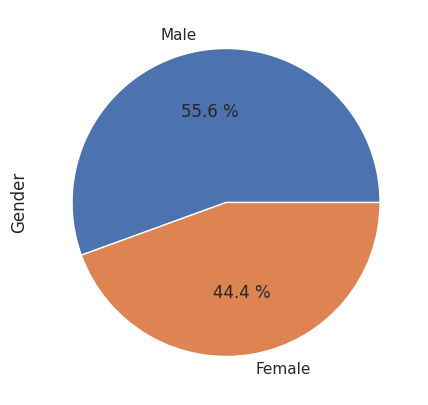

In [ ]:
#Gráfico 13 de torta hombres y mujeres filtrado por obesidad tipo 1
dataObTypeI['Gender'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

###Observaciones:
Se puede observar que los hombres (55.6%) presentan una mayor frecuencia de Obesidad Tipo I por sobre las mujeres (44.4%).

##Filtro de datos
Se realizo un filtro de los datos sin la modificación de ellos, donde se separó por la variable genero (Gender) y se realizaron un par de analísis exploratorios extras.

In [ ]:
dataWoman = data.query("Gender == 'Female'")
IndexObesityWoman = list(dataWoman.Gender)
dataWoman

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
6,Female,23.000000,1.500000,55.000000,yes,yes,3.0,3.0,Sometimes,no,2.000000,no,1.000000,0.000000,Sometimes,Motorbike,Normal_Weight
11,Female,21.000000,1.720000,80.000000,yes,yes,2.0,3.0,Frequently,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Overweight_Level_II
15,Female,22.000000,1.700000,66.000000,yes,no,3.0,3.0,Always,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


In [ ]:
dataMen = data.query("Gender == 'Male'")
IndexObesityMen = list(dataMen.Gender)
dataMen

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
2,Male,23.000000,1.800000,77.000000,yes,no,2.000000,3.000000,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.000000,3.000000,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.000000,1.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.000000,1.620000,53.000000,no,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Automobile,Normal_Weight
7,Male,22.000000,1.640000,53.000000,no,no,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1794,Male,30.642430,1.653876,102.583895,yes,yes,2.919526,2.142328,Sometimes,no,1.175714,no,0.958555,0.636289,no,Public_Transportation,Obesity_Type_II
1795,Male,20.068432,1.657132,105.580491,yes,yes,2.724121,1.437959,Sometimes,no,1.590418,no,0.029603,1.122118,no,Public_Transportation,Obesity_Type_II
1796,Male,20.914366,1.644751,101.067988,yes,yes,2.801992,1.343117,Sometimes,no,1.128942,no,0.233987,0.819980,no,Public_Transportation,Obesity_Type_II
1797,Male,25.512048,1.660761,104.321463,yes,yes,2.748971,1.213431,Sometimes,no,1.448875,no,0.128548,1.239038,no,Public_Transportation,Obesity_Type_II


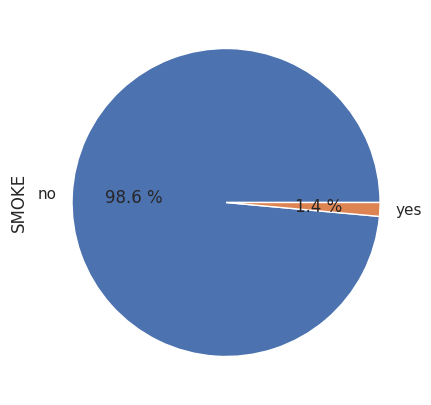

In [ ]:
#Gráfico 14 de torta mujeres fumadoras
dataWoman['SMOKE'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

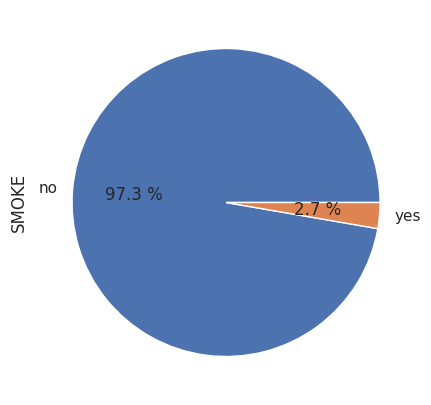

In [ ]:
#Gráfico 15 de torta hombres fumadores
dataMen['SMOKE'].value_counts().plot.pie(figsize=(5,5), autopct="%0.1f %%");

###Observaciones:
Se puede observar que en ambos generos el consumo de cigarro es bajo, el cual no supera el 3%.

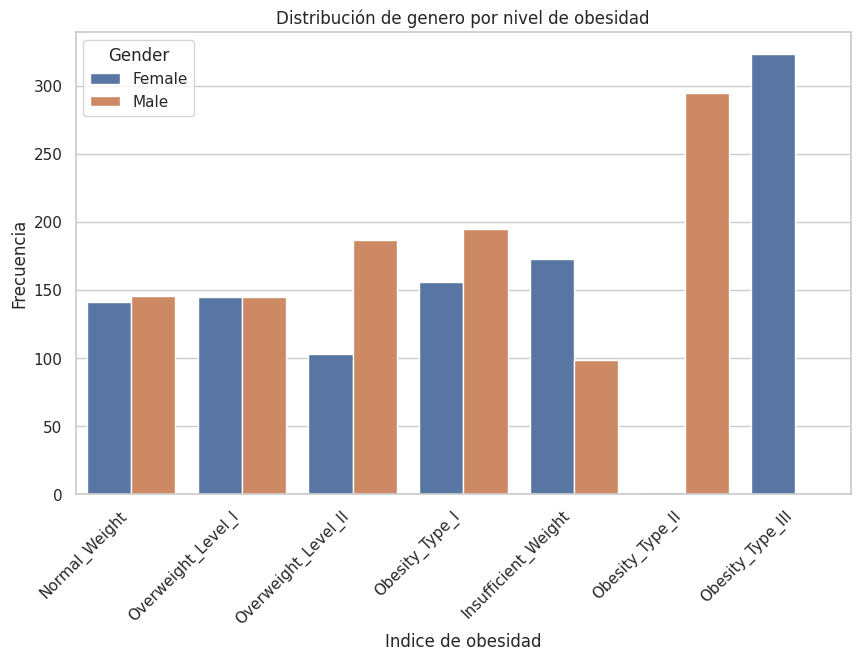

In [ ]:
# Gráfico 16 de barras de genero e indice de obesidad
sns.set(style="whitegrid")

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=data, dodge=True, ax=ax)

# Etiquetas
ax.set(xlabel="Indice de obesidad", ylabel="Frecuencia", title="Distribución de genero por nivel de obesidad")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

### OBSERVACIONES

Según el gráfico se nota que la mayoría de los hombres están clasificados como 'Obesidad tipo II', mientras que más mujeres se encuentran en el nivel máximo de obesidad "Obesidad tipo III". Tambien es posible observar que no hay una diferencia notable entre los generos en el peso normal.

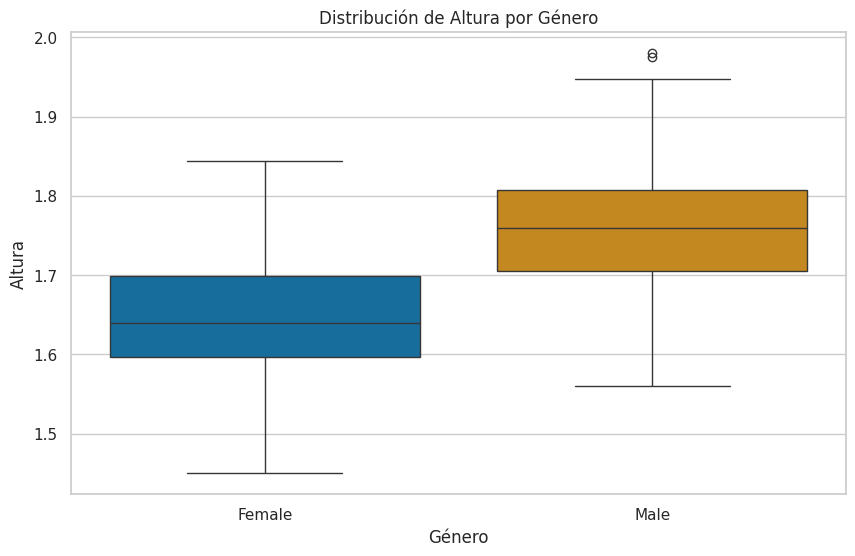

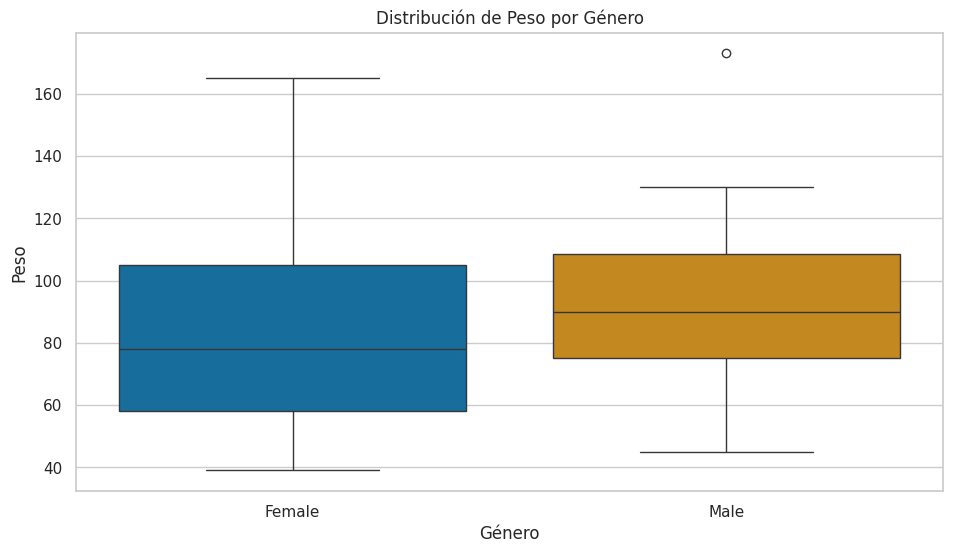

In [ ]:
# Gráfico 17 box splot para la altura (Height)
fig3, ax3 = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Gender', y='Height', data=data, palette='colorblind', ax=ax3)
ax3.set(title="Distribución de Altura por Género", xlabel="Género", ylabel="Altura")

# Gráfico 18 box splot para el peso (Weight)
fig4, ax4 = plt.subplots(figsize=(10, 6))
sns.boxplot(x='Gender', y='Weight', data=data, palette='colorblind', ax=ax4)
ax4.set(title="Distribución de Peso por Género", xlabel="Género", ylabel="Peso")

# Mostrar ambos gráficos
plt.tight_layout(pad=2.0)
plt.show()

###OBSERVACIONES

Según el analisis realizado se nota claramente que la altura mediana de las mujeres en la muestra es notablemente inferior a la de los hombres, incluso con un par de hombres que alcanzan los 1.98 metros (outliers). Sin embargo, la diferencia no es tan marcada en cuanto a sus pesos. Nuevamente, se identifica a un hombre como un valor atípico debido a que su peso supera los 165 kilogramos.

##Matriz de Correlación

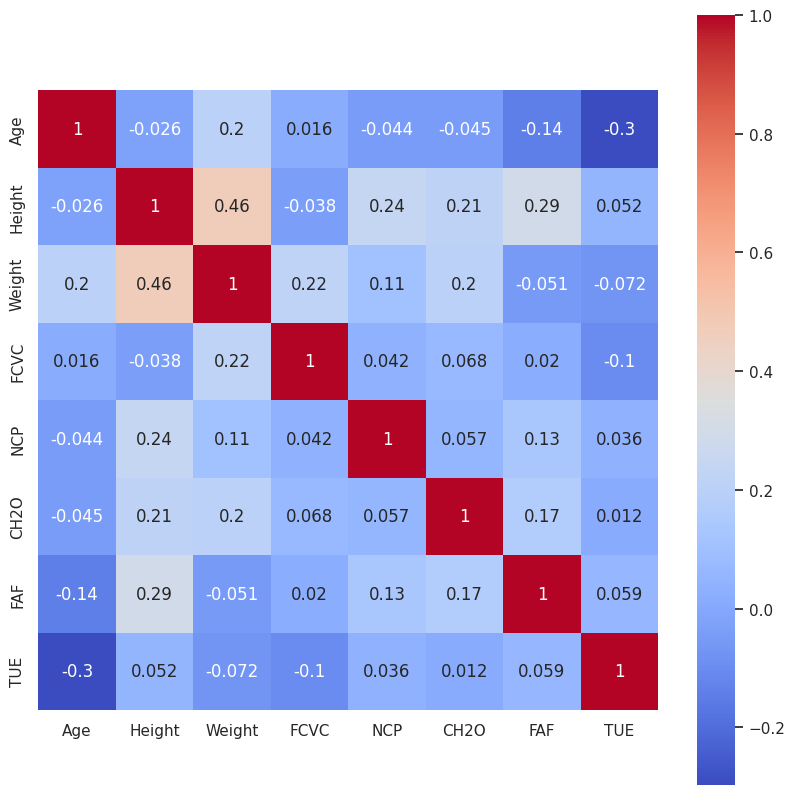

In [ ]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(10,10))  # tamaño del gráfico
sns.heatmap(data=corr,square=True, annot=True,cmap='coolwarm');

#II.- Intervención de Datos

In [ ]:
data.describe(include = ['object']).T

,count,unique,top,freq
Gender,2111,2,Male,1068
family_history_with_overweight,2111,2,yes,1726
FAVC,2111,2,yes,1866
CAEC,2111,4,Sometimes,1765
SMOKE,2111,2,no,2067
SCC,2111,2,no,2015
CALC,2111,4,Sometimes,1401
MTRANS,2111,5,Public_Transportation,1580
NObeyesdad,2111,7,Obesity_Type_I,351


In [ ]:
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


##II.I.- Eliminación de Columnas

##II.II.- Transformación de Datos

###1.- Variable 'Gender'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Gender']= le.fit_transform(data['Gender'])
data.Gender.value_counts()

1    1068
0    1043
Name: Gender, dtype: int64

###2.- Variable 'family_history_with_overweight'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['family_history_with_overweight']= le.fit_transform(data['family_history_with_overweight'])
data.family_history_with_overweight.value_counts()

1    1726
0     385
Name: family_history_with_overweight, dtype: int64

###3.- Variable 'FAVC'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['FAVC']= le.fit_transform(data['FAVC'])
data.FAVC.value_counts()

1    1866
0     245
Name: FAVC, dtype: int64

###4.- Variable 'CAEC'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CAEC']= le.fit_transform(data['CAEC'])
data.CAEC.value_counts()

2    1765
1     242
0      53
3      51
Name: CAEC, dtype: int64

###5.- Variable 'SMOKE'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SMOKE']= le.fit_transform(data['SMOKE'])
data.SMOKE.value_counts()

0    2067
1      44
Name: SMOKE, dtype: int64

###6.- Variable 'SCC'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['SCC']= le.fit_transform(data['SCC'])
data.SCC.value_counts()

0    2015
1      96
Name: SCC, dtype: int64

###7.- Variable 'CALC'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['CALC']= le.fit_transform(data['CALC'])
data.CALC.value_counts()

2    1401
3     639
1      70
0       1
Name: CALC, dtype: int64

###8.- Variable 'MTRANS'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['MTRANS']= le.fit_transform(data['MTRANS'])
data.MTRANS.value_counts()

3    1580
0     457
4      56
2      11
1       7
Name: MTRANS, dtype: int64

###9.- Variable 'NObeyesdad'

In [ ]:
#Transformación de valores categoricos a númericos
#Label encoder:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['NObeyesdad']= le.fit_transform(data['NObeyesdad'])
data.NObeyesdad.value_counts()

2    351
4    324
3    297
5    290
6    290
1    287
0    272
Name: NObeyesdad, dtype: int64

In [ ]:
data.head(5)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6


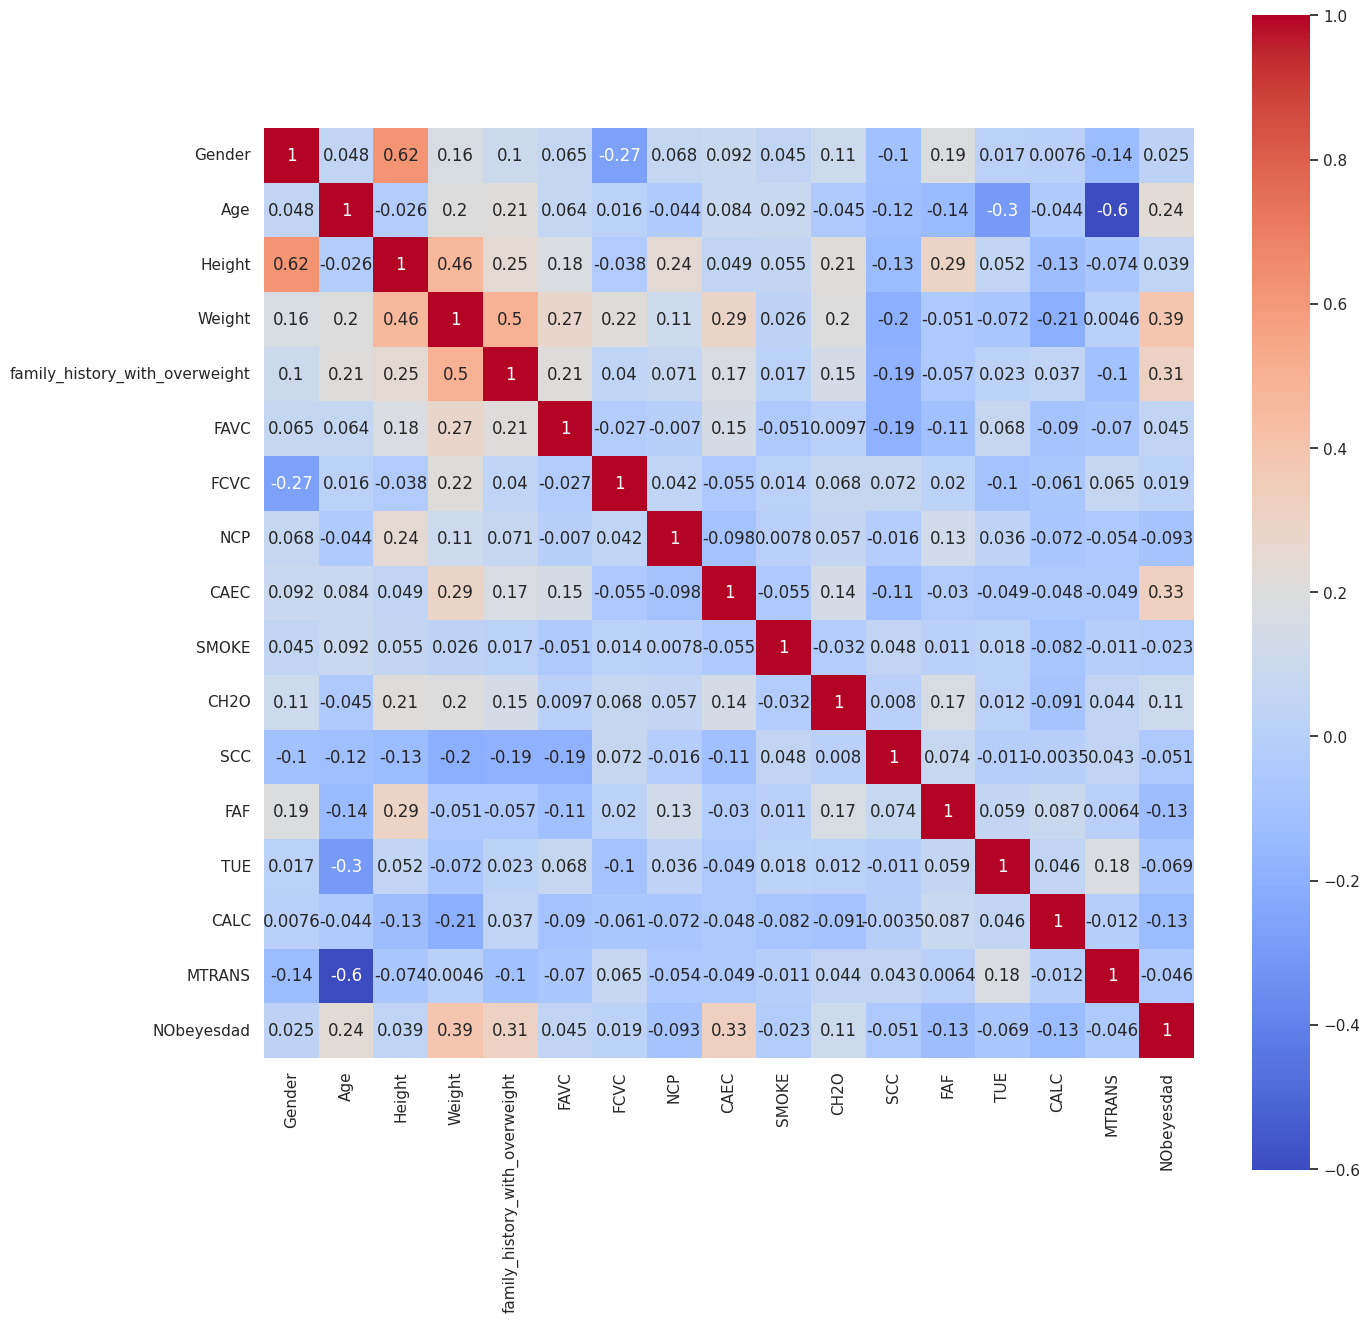

In [ ]:
corr = data.corr(method ='pearson')
plt.figure(figsize=(15,15))  # tamaño del gráfico
sns.heatmap(data=corr,square=True, annot=True,cmap='coolwarm');